In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Preprocessing of Text for Analysis Purposes

## Import filtered dataframe

In [5]:
df = pd.read_json('../raw_data/df_with_age_gender.json')

In [6]:
pd.set_option("display.max_rows", None)

In [6]:
len(df)

555

## Cleaning Functions

In [7]:
### Specific functions to standup/scraps from the loft
def remove_music(text):
    text = re.sub('♪.*?♪', '', text) # remove ♪ stuff that looks like this ♪
    return text

def remove_bracketed(text):
    text = re.sub('\[.*?\]', '', text) # remove [stuff that looks like this]
    text = re.sub('\(.*?\)', '', text) # remove (stuff that looks like this)
    return text

def remove_useless(text):
    text = re.sub('\n\w+\(\s\w+\)?\:\s', '', text) # remove Word: or Word word: with a newline before
    text = re.sub('subtitles? by \w+', '', text) # remove subtile(s) by xxxx
    return text

In [8]:
# general functions for text pre-processing
def remove_punc(text, chars):
    txt = text
    for punc in chars:
        txt = txt.replace(punc, '')
    return txt

def remove_num(text):
    return ''.join(char for char in text if not char.isdigit())

def remove_stopw(text, word_list):
    word_tokens = word_tokenize(text)
    return ' '.join(w for w in word_tokens if not w in word_list)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split(' ') if len(lemmatizer.lemmatize(word))>2)

In [9]:
def manual_lemmatizer(text):
    text = text.replace('got', 'get').replace(
        'gon', 'go').replace(
        'said', 'say').replace(
        'fucking', 'fuck').replace(
        'went', 'go').replace(
    'finding', 'find')
    return text

In [10]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

## Modifying & applying removal lists 

In [11]:
clean_df = df.copy()

### Remove everything in Brackets, Music notes

In [12]:
clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_bracketed)

In [ ]:
## TODO: Remove ♪ from specific comedians:
# [Bo Burnham]

In [ ]:
# clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_music)

### Lowercase, remove useless regex matches, numbers, stopwords and punctuation
Including specific scraps format

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].str.lower()

In [14]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_useless)

In [15]:
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', "that's", "i'm", "don't"]
# other possible removals 'netflix special', 'full transcript' 

In [16]:
stopwords_plus = words_to_remove + stopwords.words('english')

In [17]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_num)

In [18]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(stopwords_plus,))

In [19]:
punc_added = string.punctuation + '“”‘’…♪¶'

clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_punc, args=(punc_added,))

In [20]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(lemmatize).apply(manual_lemmatizer)

### Remove numbers and stopwords + common comedy words

In [21]:
clean_df.head()

full_transcript       artist  \
0  [rock music playing]\n\n[indistinct chatter]\n...  Adam Devine   
1    strong language. CHEERING Yes, yes, yes! How...    Adam Hess   
2   Ladies and gentlemen, please welcome your hos...   Adam Hills   
3    some strong language and adult humour Ladies...   Adam Hills   
4  Adam Hills? CHEERING Hello, Apollo. I am going...   Adam Hills   

                                show_name    year                source  \
0                  Best Time Of Our Lives  2019.0  Scraps from the Loft   
1                       Live from the BBC  2016.0                   BBC   
2   Live at the Apollo Series 9 Episode 4  2013.0                   BBC   
3  Live at the Apollo Series 12 Episode 4  2016.0                   BBC   
4   Live at the Apollo Series 5 Episode 5  2009.0                   BBC   

   artist_birthday  artist_gender  age_then  \
0           1983.0              2      36.0   
1           1990.0              2      26.0   
2           1970.0              2      43.0   
3           1970.0              2      46.0   
4           1970.0              2      39.0   

                               full_transcript_clean  
0  hey man let adam devine hey everybody right ye...  
1  strong language yes yes yes well hello lovely ...  
2  please welcome host tonight adam hill hello lo...  
3  strong language adult humour please welcome ho...  
4  adam hill hello apollo going start saying some...

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


In [59]:
t = clean_df['full_transcript_clean'].astype(str)

vectorizer = CountVectorizer(min_df = 0.3, max_df = 0.8, ngram_range=(1,2))
X = vectorizer.fit_transform(t)
bow_df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
bow_df

/Users/beebo/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


able  absolutely  across  act  actually  adult  age  ago  ahead  air  \
0       9           2       0    4         6     10    6    6      0    1   
1       0           0       0    0         2      0    0    3      0    0   
2       0           3       1    2         0      0    0    0      0    1   
3       0           2       3    2         0      1    1    2      0    0   
4       0           0       0    1         0      0    1    2      0    0   
5       1           3       1    0         1      0    0    3      3    2   
6       0           0       0    0         0      0    0    7      0    0   
7       0           1       0    0         6      0    0    1      0    0   
8       1           0       1    1         2      0    1    1      2    1   
9       0           2       0    0         0      0    1    0      0    0   
10      0           0       2    1         0      0    0    0      0    0   
11      0           1       0    0         2      0    0    0      0    0   
12      0           0       0    0         2      0    0    0      0    0   
13      0           0       0    0         1      0    1    0      0    0   
14      0           0       0    0         2      1    0    3      0    0   
15      2           0       0    1         1      0    2    1      1    0   
16      0           0       0    1         0      0    2    4      0    0   
17      0           2       1    4         7      0    2    0      3    1   
18      0           0       4    0         1      0    0    0      1    0   
19      1           0       1    2         6      0    1    0      1    0   
20      1           0       0    1         1      1    1    3      0    0   
21      2           0       1    1         1      0    5    3      0    0   
22      0           1       0    1         0      1    0    1      0    1   
23      1           2       0    0         0      0    4    0      0    0   
24      1           0       0    4         0      0    0    2      0    2   
25      0           0       0    0         0      0    1    0      1    0   
26      0           0       0    0         0      0    0    0      0    0   
27      2           1       3    2         8      1    1    0      0    0   
28      6           2       6    1        13      0    1    1      1    0   
29      1           0       0    3         4      0    0    0      0    0   
30      4           0       0    0         0      1    2    0      1    0   
31      1           1       0    1         1      0    0    1      0    0   
32      1           0       2    1         1      0    0    3      1    1   
33      0           3       2    0         3      0    0    7      0    1   
34      0           0       0    1         6      0    0    9      0    0   
35      0           0       0    1         7      0    0    3      0    1   
36      1           6       0    1         3      0    2    5      2    0   
37      0           0       0    0         2      2    0    2      0    2   
38      2           0       0    1         3      0    1    2      0    0   
39      1           0       0    1         7      0    3    8      2    0   
40      1           0       0    4         7      2    3    5      1    0   
41      1           0       0    0         4      0    0    8      1    0   
42      0           0       0    2         5      0    2    0      0    2   
43      0           0       1    0         4      0    1    2      0    0   
44      0           0       0    0         0      0    0    0      0    0   
45      1           0       3    0         1      0    1    1      0    3   
46      0           0       2    0         1      3    0    5      0    2   
47      0           3       3    3        12      0    2    7      5    0   
48      0           0       0    1         3      0    0    0      0    0   
49      0           0       0    0         2      2    0    0      0    0   
50      0           0       0    0         9      2    2    4      0    0   
5

In [60]:
keys = bow_df.sum().index
values = bow_df.sum().values
bow_dict = dict(zip(keys, values))
print(bow_dict)

{'able': 465, 'absolutely': 384, 'across': 438, 'act': 713, 'actually': 1744, 'adult': 368, 'age': 694, 'ago': 1136, 'ahead': 321, 'air': 483, 'airport': 403, 'alive': 276, 'allowed': 362, 'almost': 577, 'alone': 609, 'along': 484, 'already': 739, 'also': 1301, 'amazing': 962, 'america': 1119, 'american': 1043, 'and': 1362, 'angry': 433, 'animal': 498, 'another': 1741, 'answer': 636, 'anybody': 783, 'anymore': 659, 'anyone': 940, 'anyway': 967, 'anywhere': 264, 'apparently': 312, 'appreciate': 302, 'area': 358, 'arm': 517, 'ask': 1295, 'asked': 690, 'asking': 344, 'asshole': 590, 'audience': 887, 'away': 2038, 'baby': 2471, 'back like': 250, 'bad': 2041, 'bag': 727, 'ball': 954, 'bar': 712, 'basically': 414, 'bathroom': 521, 'beat': 471, 'beautiful': 932, 'become': 410, 'bed': 1130, 'behind': 891, 'believe': 1513, 'best': 1542, 'better': 1993, 'biggest': 298, 'bitch': 1552, 'black': 2670, 'blow': 462, 'blue': 408, 'body': 991, 'book': 724, 'born': 386, 'bottom': 278, 'bought': 468, 'bo

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(clean_df['full_transcript_clean'])

data_vectorized = vectorizer.transform(clean_df['full_transcript_clean'])

lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('djalili', 0.20007105146907134), ('omid', 0.2000676854515727), ('reginald', 0.2000519871277244), ('maxwell', 0.20002940871736533), ('hadda', 0.20002870215443067), ('getta', 0.20002870215443067), ('namoo', 0.20002870215443067), ('letta', 0.20002870215443067), ('ahahaha', 0.20002870215443067), ('manoo', 0.20002870215443067)]
Topic 1:


/Users/beebo/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('djalili', 0.2000710514704339), ('omid', 0.2000676854535061), ('reginald', 0.20005198716875272), ('maxwell', 0.20002940872419908), ('getta', 0.20002870511513618), ('warble', 0.20002870511513618), ('ahahaha', 0.20002870511513618), ('malla', 0.20002870511513618), ('namoo', 0.20002870511513618), ('nama', 0.20002870511513618)]
Topic 2:
[('djalili', 0.20007105146247187), ('omid', 0.20006768544405695), ('reginald', 0.20005198716565215), ('maxwell', 0.20002940869840666), ('letta', 0.20002870227391858), ('getta', 0.20002870227391858), ('hadda', 0.20002870227391858), ('malla', 0.20002870227391858), ('manoo', 0.20002870227391858), ('warble', 0.20002870227391858)]
Topic 3:
[('djalili', 0.6139512353326202), ('omid', 0.5627189413493319), ('reginald', 0.3167829076967058), ('hunter', 0.20371935544558387), ('goodnight', 0.2011631043847867), ('bee', 0.20074189158779293), ('medium', 0.2004718312250474), ('much', 0.20003711947253494), ('maxwell', 0.20002940512114536), ('warble', 0.2000287005600943)]
To

In [31]:
token_df = clean_df['full_transcript_clean'].apply(tokenize).astype(str)
token_df

0      ['hey', 'man', 'let', 'adam', 'devine', 'hey',...
1      ['strong', 'language', 'yes', 'yes', 'yes', 'w...
2      ['please', 'welcome', 'host', 'tonight', 'adam...
3      ['strong', 'language', 'adult', 'humour', 'ple...
4      ['adam', 'hill', 'hello', 'apollo', 'going', '...
5      ['okay', 'ready', 'and', 'take', 'cue', 'adam'...
6      ['netflix', 'comedy', 'special', 'casino', 'li...
7      ['aisling', 'bea', 'hello', 'hello', 'apollo',...
8      ['please', 'give', 'warm', 'welcome', 'madriga...
9      ['please', 'welcome', 'host', 'tonight', 'murr...
10     ['please', 'welcome', 'host', 'tonight', 'murr...
11     ['porter', 'hello', 'goodnight', 'wow', 'amazi...
12     ['strong', 'language', 'please', 'welcome', 'h...
13     ['lady', 'please', 'welcome', 'host', 'tonight...
14     ['alex', 'edelman', 'much', 'comedian', 'new',...
15     ['please', 'welcome', 'stage', 'ali', 'wong', ...
16     ['please', 'welcome', 'stage', 'ali', 'wong', ...
17     ['please', 'welcome', 'h

In [32]:
pd.Series([y for x in token_df.values.flatten() for y in x.split()]).value_counts()

'like',                                             48497
'get',                                              34240
'know',                                             27701
'say',                                              19587
'right',                                            14734
'fuck',                                             13785
'one',                                              13158
'go',                                               12951
'people',                                           12587
'think',                                             9637
'thing',                                             9158
'going',                                             9037
'guy',                                               9004
'want',                                              8873
'yeah',                                              8711
'time',                                              8681
'shit',                                              8547
'would',      

In [ ]:
# frequent_words = ['like']
# clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(frequent_words,))

In [33]:
full_transcripts = ' '.join(clean_df['full_transcript_clean'])

In [34]:
len(full_transcripts)

9741082

In [35]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [36]:
word_cloud = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate(full_transcripts)

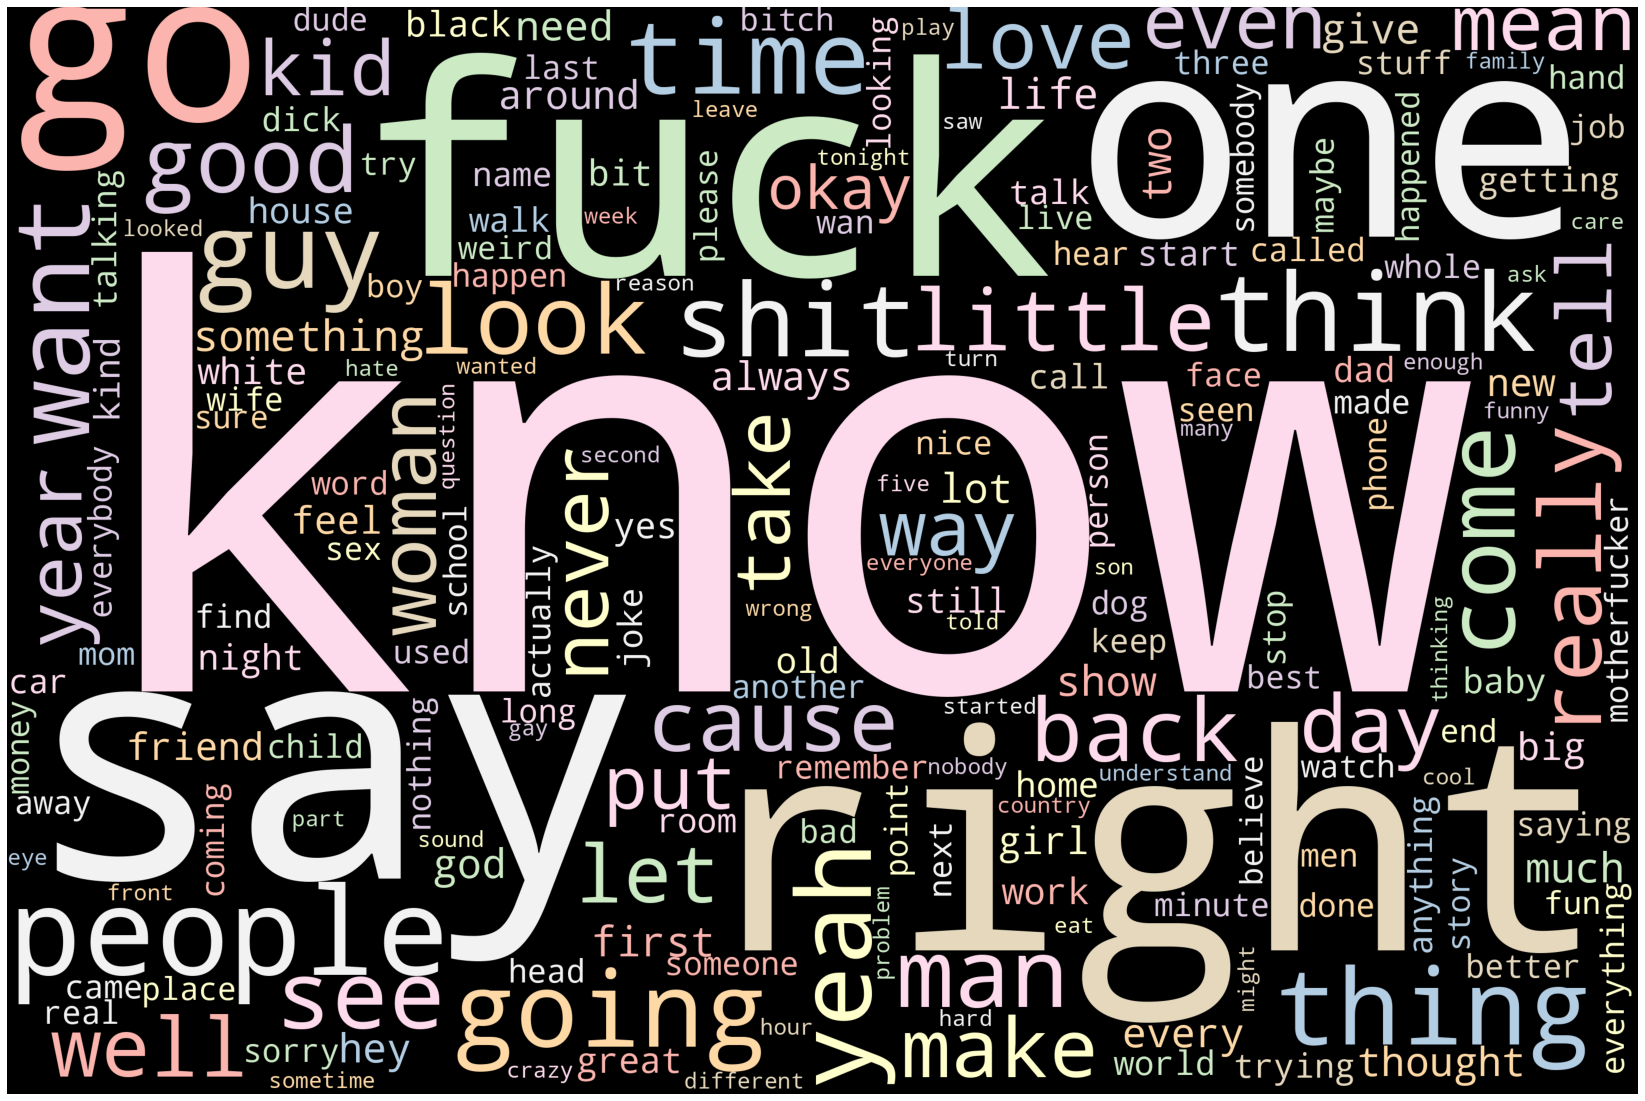

In [37]:
plot_cloud(word_cloud)

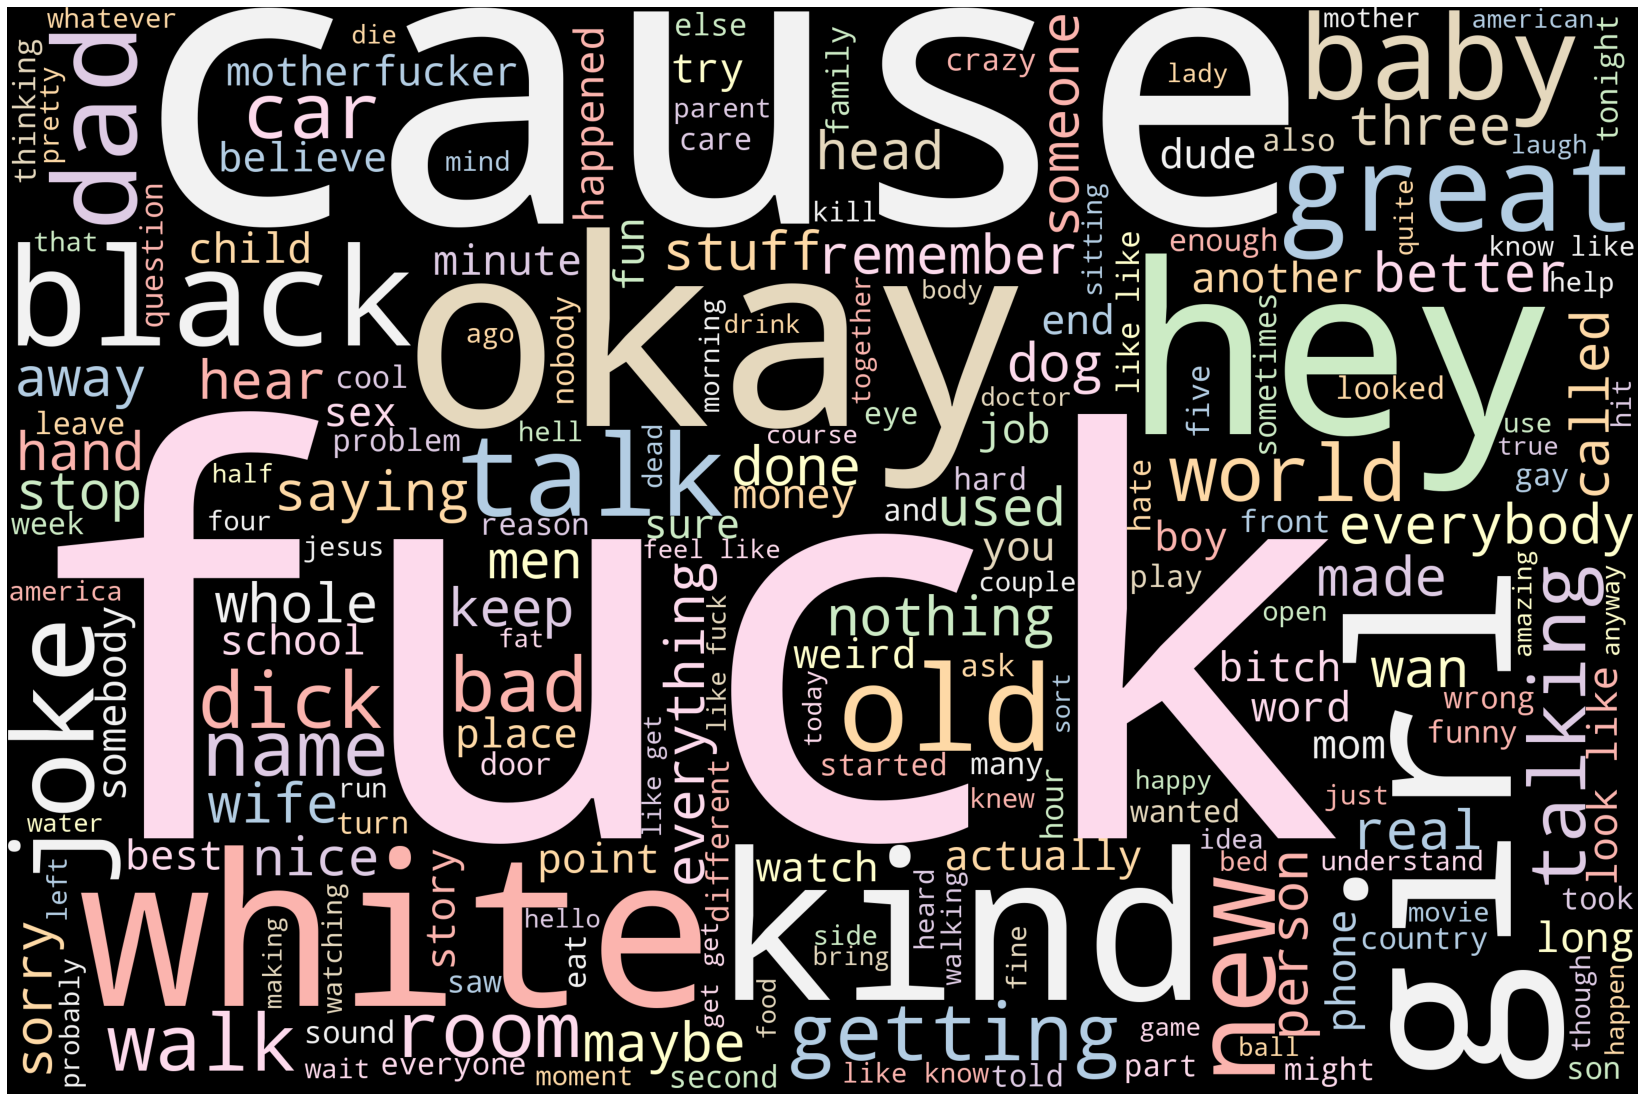

In [61]:
word_cloud2 = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate_from_frequencies(bow_dict)
plot_cloud(word_cloud2)